# Model 800 basicRt coupled steady state solution

This notebook is for the EMS paper. It will have a model800 landscape (stream power and linear diffusion with rock and till) at steady state. There will be two outputs from this notebook: 1) a NetCDF file of the topography, which we will use to make an oblique Paraview image of the landscape, and 2) a slope-area plot at steady state.

Importantly, this will be one of the "user-friendly" notebooks that get submitted along with the EMS paper.

#### Charlie working on

In [1]:
from terrainbento import BasicRt
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#parameter dictionary
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_rock_sp' : 0.001,
          'K_till_sp' : 0.01,
          'm_sp' : 0.5,
          'n_sp' : 1.0,
          'linear_diffusivity' : 0.1,
          'outlet_lowering_rate' : 0.0005,
          'output_filename' : 'model_000_output',
          'rock_till_file__name' : 'ss_test_rock_till.txt',
          'contact_zone__width' : 1.0
}

In [3]:
#instantiate and establish topo error tolerance
rt = BasicRt(params=params)
tolerance = 0.0001

In [4]:
#time loop
dt = 10.
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = rt.grid.at_node['topographic__elevation'][rt.grid.core_nodes]
    rt.run_one_step(dt)
    post_topo = rt.grid.at_node['topographic__elevation'][rt.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print(elapsed_time)
        print('MAX: ', max(abs(pre_topo - post_topo)))
        print('MEAN: ', np.average(abs(pre_topo - post_topo)))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
MAX:  0.258234940157
MEAN:  0.0260875992489
1000.0
MAX:  0.00860693461928
MEAN:  0.00198316569345
2000.0
MAX:  0.00520946252561
MEAN:  0.00153926975238
3000.0
MAX:  0.0100789488517
MEAN:  0.00124372091733
4000.0
MAX:  0.00665195885698
MEAN:  0.00090212437899
5000.0
MAX:  0.0048231819752
MEAN:  0.000622220105699
6000.0
MAX:  0.00455964789454
MEAN:  0.00043564181085
7000.0
MAX:  0.0102524733267
MEAN:  0.000324607244809
8000.0
MAX:  0.00308208669309
MEAN:  0.000229931440642
9000.0
MAX:  0.00668479323102
MEAN:  0.000174474987844
10000.0
MAX:  0.00388680967004
MEAN:  0.000137448514886
11000.0
MAX:  0.00288266068905
MEAN:  0.0001116955584
12000.0
MAX:  0.00281720472637
MEAN:  0.000106138491279
13000.0
MAX:  0.00253354797759
MEAN:  9.65748413757e-05
14000.0
MAX:  0.00332013835513
MEAN:  0.000100039934653
15000.0
MAX:  0.00264139480242
MEAN:  9.81659101319e-05
16000.0
MAX:  0.00287408333492
MEAN:  9.24394540208e-05
17000.0
MAX:  0.00237254529164
MEAN:  9.01883743992e-05
18000.0
MAX:  0.00390

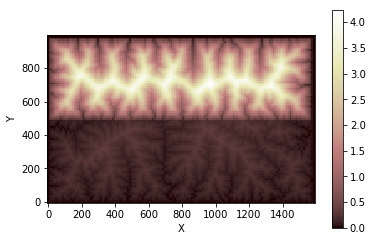

In [5]:
%matplotlib inline
imshow_grid(rt.grid, 'topographic__elevation')

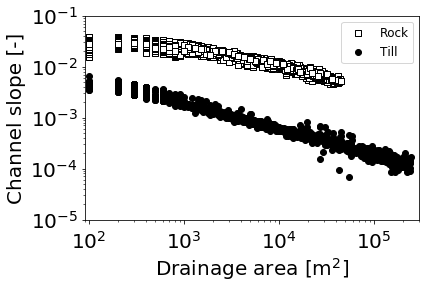

In [6]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array for ROCK
area_array_rock = rt.grid.at_node['drainage_area'][(rt.grid.node_x > 10)&(rt.grid.node_x < 1580)&(rt.grid.node_y >=500)&(rt.grid.node_y<980)]
slope_array_rock = rt.grid.at_node['topographic__steepest_slope'][(rt.grid.node_x > 10)&(rt.grid.node_x < 1580)&(rt.grid.node_y >=500)&(rt.grid.node_y<980)]

#assign area_array and slope_array for TILL
area_array_till = rt.grid.at_node['drainage_area'][(rt.grid.node_x > 10)&(rt.grid.node_x < 1580)&(rt.grid.node_y >10)&(rt.grid.node_y<500)]
slope_array_till = rt.grid.at_node['topographic__steepest_slope'][(rt.grid.node_x > 10)&(rt.grid.node_x < 1580)&(rt.grid.node_y >10)&(rt.grid.node_y<500)]

#plotting param
matplotlib.rcParams.update({'font.size': 20})

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k_rock = 0.001 #fluvial erodibility for rock
k_till = 0.01
m = 0.5 #discharge exponent
n = 1.0 #slope exponent

#calculate analytical slope from area field for ROCK
#analytical_slope_array = np.power((u / k_rock), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution for ROCK
#slope_area.plot(area_array, analytical_slope_array, linestyle='-',
#                color='k', linewidth = 1, label = 'Analytical solution: rock')

#plot the data for ROCK
slope_area.scatter(area_array_rock, slope_array_rock, marker='s', edgecolor='0', color='1', 
                   label = 'Rock') #plot HA data
#####################################################################
#calculate analytical slope from area field for TILL
#analytical_slope_array = np.power((u / k_till), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution for TILL
#slope_area.plot(area_array, analytical_slope_array, linestyle='-',
#                color='lightgrey', linewidth = 1, label = 'Analytical solution: till')

#plot the data for TILL
slope_area.scatter(area_array_till, slope_array_till, color='k', 
                   label = 'Till') #plot HA data

#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 3*10**5)
slope_area.set_ylim(1e-5, 1e-1)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('maintext_rock_till_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

In [7]:
#export NetCDF for Paraview image of topography
from landlab.io.netcdf import write_netcdf
write_netcdf('maintext_rock_till.nc', rt.grid, format='NETCDF3_64BIT', names='topographic__elevation')